# Setting up the datafile

We want to create synthetic stars using some dataset of stellar parameters

In [11]:
import func #Contains useful functions (and some unimportant ones)
import pandas as pd
import numpy as np
#Not necessarily nice but we will have some cases of division by zero which are irrelevant - filter them out
import warnings
warnings.filterwarnings("ignore")

#All stellar data used for the paper is in the folder stellar_data
stellar_data_path = 'stellar_data/'

#Use the full data for this example
#They can be separated using the column "Cat" which specifies the population the star belongs to
data = pd.read_csv(stellar_data_path+'SAPP_total_data_Jesper_final_snr_cut_50.csv')

#Set the data to be fit
feh = data['feh_reso_bay'].values
mgfe = data['mgfe_reso_bay'].values

#Set the new feh values for the synthesised data
new_feh = np.array([-0.5,0,0.5])
#Set the stellar masses
masses = np.ones(3)

#scale_data takes in the data to be fit to, the new feh values and the stellar masses of the new data
#It outputs all the abundances relative to H (not scaled with solar i.e only n_x/n_H)
#names sets the names of the star (usually just set to a number)
#if df = True, its creates a pandas dataframe with correct column names
#If scatter is True, it introduces scatter to the new abundances
#Scatter is drawn from a normal distibution with mean 0 and width equal to the mean of the residuals from the fit
mock_df = func.scale_data(feh, mgfe, new_feh,
                       df=True,mass = masses,names = ['low_fe','solar_fe','high_fe'])

mock_df.to_csv('input_data/mock_example.csv',index=False)

# Setting up the integration

The integration script (init.py) reads the init_args.csv file where all the inputted parameters are, these can be set manually by editing the file in e.g. OpenOffice or through pandas. All the integrations for the paper that were made can be found in run_file.py where simple functions editing init_args.csv and running init.py has been created. 

Here, I go over all the input parameters in init_args.csv

In [13]:
init_args = pd.read_csv('init_args.csv',sep=';')

#If the protoplanets are initialised in a grid in sma and time: sets the number of grid points. 
#The total number of planets then becomes N_grid**2
init_args['N_grid'] = 100

#Sets the number of protoplanets initalised if not in a grid
init_args['N_bodies'] = 10**4

#The name of the input file (without .csv)
init_args['input_name'] = 'mock_example'

#Name of the output folder - will automatically be stored in the 'data' folder
init_args['output_name'] = 'mock_example'

#Is a boolean, sets whether or not I want to run an integration for the sun. If true, ignores input file name
init_args['sun'] = 0

#Boolean, if the same output folder exists, this will delete the old one and replace with the new output
init_args['overwrite'] = 1 

#Boolean, if True, will store all positions and masses of all bodies for all timesteps 
#(WARNING: slow and creates a lot of data, also untested with latest updates)
init_args['store_full'] = 0

#Sets if I want to calculate the isolation mass from Bitsch or from the gap mass calculated by Kanagawa
#Default is bitsch, allowed values 'bitsch', 'gap'
#If bitsch: calculate gap mass as 2.3*M_iso
init_args['iso'] = 'bitsch'

#Boolean, if True, I don't allow iron oxidation in the disc
init_args['free_iron'] = 1

#Boolean, if True I use the carbon model including carbon grains in the paper, 
#if False, I use the other carbon model in e.g. Bitsch & Battistini (2020)
init_args['carbon_grain'] = 1

#Sets if temperature is pure irradiation or also viscous heating
init_args['viscous_heating'] = 0

#Sets if I want to use the pebble flux model from Drazkowska (2021) or if the pebble flux should be set to Z*M_dotg
#If True, M_dotp = Z*M_dotg
init_args['constant_flux'] = 0

#Sets if I want to use the RCB atmosphere temperature or just disc temperature for planets
#If True: RCB
init_args['evap'] = 1

#Sets if I want to initalise the planets in a grid
init_args['grid'] = 0

#Sets the earliest starting point for protoplanet growth (in Myr)
#The starting times for each planet will be uniformly sampled between t_low and 95% of the disc lifetime
init_args['t_low'] = 0.01

#Sets the lower limit for initial position of protoplanets (in AU)
#The starting positions will be log-uniformly samples between r_low and 95% of the disc size
init_args['r_low'] = 0.5

#Integration timestep (in Myr)
init_args['dt'] = 0.001

#Initial protplanet mass (in Earth masses)
init_args['M_0'] = 0.01

#Pebble stokes number, only used if constant_flux = 1
init_args['St'] = 0.01

#Dust diffustion coefficient
init_args['delta'] = 0.0001

#Fragmentation velocity (in m/s)
init_args['v_f'] = 2

#Store the file
init_args.to_csv('init_args.csv',sep=';',index=False)


# Running the integration

The integration is run by running init.py which reads init_args.csv and shapes the input data to fit the integration class. It also initalises the protoplanets based on the parameters in init_args.csv

After the integration is complete, it creates a folder in 'data' with the same name as output name

The output file is called output.h5 and uses the file format HDF5 which is a filetype capable of organising data in a tree structure, similar to folders. It is read in python using h5py. The class DataHandler will take care of all the essentials for reading these files

In [14]:
import runpy

runpy.run_path('init.py')

0.145

/Users/jespernielsen/gce-planetformation/integrate_viscous.py:709: RuntimeWarning: divide by zero encountered in true_divide
  P_rcb = P*(nabla_ad/nabla_0-nabla_ad/nabla_inf)/(1-nabla_ad/nabla_inf)
/Users/jespernielsen/gce-planetformation/integrate_viscous.py:711: RuntimeWarning: invalid value encountered in multiply
  T_rcb = T*(nabla_0/nabla_inf*(P_rcb/P-1)+1)**nabla_inf
/Users/jespernielsen/gce-planetformation/integrate_viscous.py:549: RuntimeWarning: overflow encountered in exp
  Stini = St0*np.exp(t/t_growth)


1.886

/Users/jespernielsen/gce-planetformation/integrate_viscous.py:639: RuntimeWarning: invalid value encountered in reciprocal
  dmdt_KH = 10**(-5)*(M/10)**(4)*(self.kappa/0.1)**(-1)


9.381

/Users/jespernielsen/gce-planetformation/integrate_viscous.py:711: RuntimeWarning: invalid value encountered in sqrt
  T_rcb = T*(nabla_0/nabla_inf*(P_rcb/P-1)+1)**nabla_inf


99.952Created output directory:data/mock_example


{'__name__': '<run_path>',
 '__doc__': '\nCreated on Thu Feb 10 11:42:44 2022\n\n@author: Jesper Nielsen\n',
 '__package__': '',
 '__loader__': None,
 '__spec__': None,
 '__file__': 'init.py',
 '__cached__': None,
 '__builtins__': {'__name__': 'builtins',
  '__doc__': "Built-in functions, exceptions, and other objects.\n\nNoteworthy: None is the `nil' object; Ellipsis represents `...' in slices.",
  '__package__': '',
  '__loader__': _frozen_importlib.BuiltinImporter,
  '__spec__': ModuleSpec(name='builtins', loader=<class '_frozen_importlib.BuiltinImporter'>, origin='built-in'),
  '__build_class__': <function __build_class__>,
  '__import__': <function __import__>,
  'abs': <function abs(x, /)>,
  'all': <function all(iterable, /)>,
  'any': <function any(iterable, /)>,
  'ascii': <function ascii(obj, /)>,
  'bin': <function bin(number, /)>,
  'breakpoint': <function breakpoint>,
  'callable': <function callable(obj, /)>,
  'chr': <function chr(i, /)>,
  'compile': <function compile(s

# Reading the data

The class DataHandler in data.py handles most of the data analysis. I have not yet set it up so that it can use the "with" command in python so the file needs to be manually closed

In [15]:
from data import DataHandler

output_name = 'mock_example'

dh = DataHandler('output_data/'+output_name+'/output.h5')

#dh.output contains all the output, you can see the data names using .keys
print(dh.output.keys)

#Similarly, dh.input contains the input
print(dh.input.keys)

#To see the input parameters for all the stars (N_star, 9)
input_params = dh.theta
#The names for each column is in dh.theta_names
param_names = dh.theta_names

#Planet masses can be found using dh.get_mass
#It takes:
#form (solid or gas mass, None for total mass)
#star_idx, idx for star of interest, if all stars: star_idx = None
pl_mass = dh.get_mass(form=None,star_idx = None)

#Same for final sma
pl_sma = dh.get_sma(star_idx = None)

#If interested in the mass of a particular species, use get_species
#Names are written using a hyphen between atoms e.g. C-O2, H2-O, Fe2-Si-O4
#Masses are stored in solid and gas form as e.g. C-O2_gas, C-O2_solid, and total mass C-O2
#The total masses of each element is also stored using similar naming conventions: Mg_solid, Mg_gas
#Some elements in the model can exist outside of any molecules (e.g. Fe). These are stored using the suffix _free
#E.g Fe_free_solid, Fe_free_gas
co2_mass = dh.get_species(name = 'C-O2',form = 'solid',star_idx = None)

#Core mass fractions are calculated using get_cmf

cmf = dh.get_cmf(star_idx = None)

dh.close()

<bound method MappingHDF5.keys of <HDF5 group "/output" (92 members)>>
<bound method MappingHDF5.keys of <HDF5 group "/input" (17 members)>>


# Plotting

We can now create a plot of our mock data similar to the one in the paper

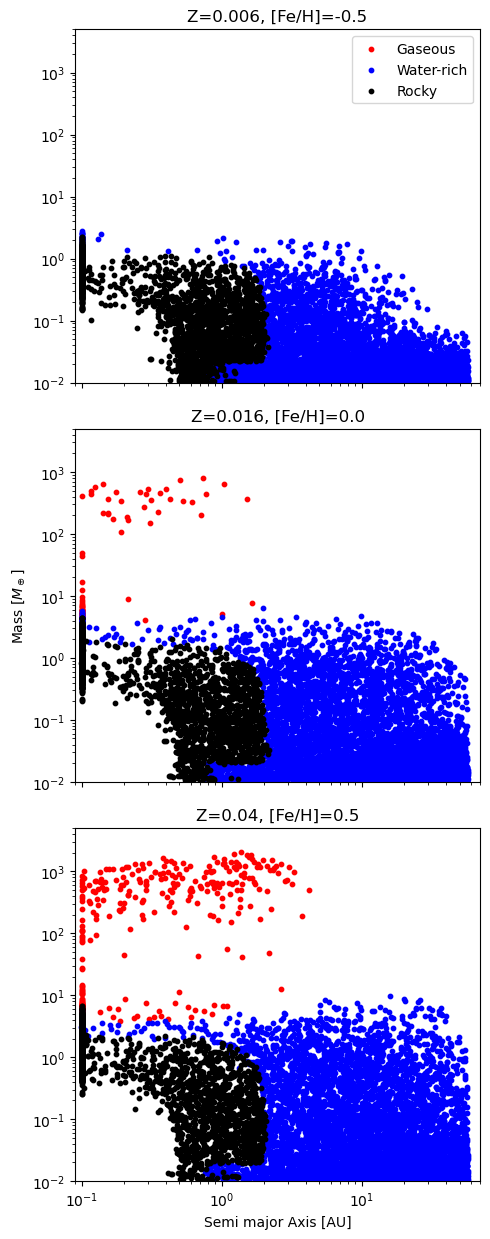

In [19]:
import matplotlib.pyplot as plt
solar_abun = pd.read_csv('solar_abun.csv')
dh = DataHandler('output_data/mock_example/output.h5')

starnames = dh.star_names

fig,axes = plt.subplots(3,1,sharex = True,sharey = True,figsize=(5,5*2.5))
s = 10
gas_lim = 0.15
wfrac_lim = 0.1

for i_star,starname in enumerate(starnames):
    
    star_idx = np.where(dh.star_names == starname)[0][0]
       
    #To plot [Fe/H] and metallicity
    abun=dh.input_abun[star_idx]
    abun_names=dh.abun_names

    theta = dh.theta[star_idx]
    
    Z = np.around(theta[np.where(dh.theta_names=="Z")[0][0]],3)
    
    Fe = abun[np.where(abun_names=="Fe/H")[0][0]]

    Fe = np.around(func.get_abun_solar(Fe, solar_abun["Fe/H"].loc[0]),1)
    
    if i_star == 1:
        
        Fe = 0.0
 

    water_mass = dh.get_species(name = 'H2-O',form=None,star_idx=star_idx)
    tot_mass = dh.get_mass(form=None,star_idx=star_idx)
    sma = dh.get_sma(star_idx = star_idx)
    gas_mass = dh.get_mass(form='gas',star_idx=star_idx)
    
    #Create categories
    gaseous = gas_mass > gas_lim*tot_mass
    water_rich = (water_mass/tot_mass >= wfrac_lim) & ~gaseous
    rocky = (water_mass/tot_mass < wfrac_lim) & ~gaseous
    
    axes[i_star].scatter(sma[gaseous],tot_mass[gaseous],c="red",s=s,label="Gaseous")
    axes[i_star].scatter(sma[water_rich],tot_mass[water_rich],c="blue",label="Water-rich",s=s)
    axes[i_star].scatter(sma[rocky],tot_mass[rocky],c="black",label="Rocky",s=s)

    axes[i_star].set_xlim(0.09,70)
    axes[i_star].set_ylim(0.01,5000)
    axes[i_star].set_xscale("log")
    axes[i_star].set_yscale("log")
    axes[i_star].set_title("Z={}, [Fe/H]={}".format(Z,Fe))
    
axes[-1].set_xlabel("Semi major Axis [AU]")
axes[1].set_ylabel("Mass [$M_\oplus$]")
axes[0].legend()
fig.tight_layout()
dh.close()